In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from datetime import datetime as dt

In [4]:
import matplotlib.pyplot as plt

In [5]:
import scipy.stats as stats

In [6]:
claims = pd.read_csv('C:/Users/yoosha/Downloads/claims.csv')

In [7]:
cust_demo = pd.read_csv('C:/Users/yoosha/Downloads/cust_demographics.csv')

In [97]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [98]:
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions. 

In [99]:
tab = pd.concat([claims , cust_demo] , axis = 1)

# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance. 

In [100]:
tab.drop(columns = 'CUST_ID', inplace = True)

In [101]:
tab['claim_date'] = pd.to_datetime(tab['claim_date'])

In [102]:
tab['DateOfBirth'] = tab['DateOfBirth'].astype('datetime64[ns]')

# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign. 

In [103]:
tab['claim_amount'] = tab['claim_amount'].str.replace('$' , '')

In [104]:
tab['claim_amount'] = tab['claim_amount'].astype('float64')

In [105]:
tab['Contact'] = tab['Contact'].str.replace('-' , '')

In [17]:
tab.drop_duplicates('customer_id', keep = False)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,7523982914,Gold
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,2569689172,Silver
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,1423247481,Silver
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,2066-09-09,RI,1655194583,Gold
10,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.0,1.0,Yes,Female,1985-12-30,KY,7644399856,Gold
11,28564401,51583214,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,Male,1999-10-31,NH,7434865264,Platinum
12,72738047,35875366,Other driver error,2018-04-24,Auto,Unknown,Material only,1870.0,1.0,No,Male,1990-09-16,MD,9549641746,Platinum
13,53780662,21240703,Other driver error,2018-09-19,Auto,Unknown,Material only,1050.0,1.0,No,Male,2063-07-22,MD,4735612675,Silver


# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims. 

In [194]:
Alert_flag = tab[tab.claim_type == 'Injury only'][['police_report' , 'claim_type']]
Alert_flag

,police_report,claim_type
5,No,Injury only
14,Yes,Injury only
17,No,Injury only
18,No,Injury only
19,Yes,Injury only
23,Yes,Injury only
29,No,Injury only
37,No,Injury only
43,No,Injury only
44,No,Injury only


In [195]:
Alert_flag.loc[((Alert_flag.police_report == 'Yes')|(Alert_flag.police_report == 'No')) ,'alert flag'] = 0

In [196]:
Alert_flag.loc[Alert_flag.police_report == 'Unknown' ,'alert flag'] = 1

In [197]:
Alert_flag

,police_report,claim_type,alert flag
5,No,Injury only,0.0
14,Yes,Injury only,0.0
17,No,Injury only,0.0
18,No,Injury only,0.0
19,Yes,Injury only,0.0
23,Yes,Injury only,0.0
29,No,Injury only,0.0
37,No,Injury only,0.0
43,No,Injury only,0.0
44,No,Injury only,0.0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical) 

In [106]:
Mode_gender = tab.loc[: , 'gender'].mode()
Mode_state = tab.loc[: , 'State'].mode()
Mode_seg = tab.loc[: , 'Segment'].mode()
Max_dob = tab.loc[: , 'DateOfBirth'].max()


In [107]:
Mode_gender

0    Male
dtype: object

In [108]:
Mode_state

0    NY
dtype: object

In [109]:
Mode_seg

0    Gold
dtype: object

In [110]:
Max_dob

Timestamp('2068-12-19 00:00:00')

In [111]:
tab['gender'].replace(np.NaN , 'Male')

0       Female
1       Female
2       Female
3       Female
4         Male
5         Male
6         Male
7         Male
8         Male
9       Female
10      Female
11        Male
12        Male
13        Male
14      Female
15        Male
16        Male
17        Male
18      Female
19      Female
20      Female
21        Male
22        Male
23      Female
24        Male
25      Female
26        Male
27        Male
28      Female
29        Male
         ...  
1070    Female
1071      Male
1072    Female
1073      Male
1074      Male
1075      Male
1076    Female
1077      Male
1078      Male
1079      Male
1080    Female
1081    Female
1082      Male
1083    Female
1084      Male
1085      Male
1086      Male
1087      Male
1088      Male
1089      Male
1090      Male
1091      Male
1092      Male
1093      Male
1094      Male
1095      Male
1096      Male
1097      Male
1098      Male
1099      Male
Name: gender, Length: 1100, dtype: object

In [112]:
tab.gender.fillna('Male',inplace = True)

In [113]:
tab['State'].replace(np.NaN , 'NY' ,inplace =True)

In [114]:
tab['Segment'].replace(np.NaN , 'Gold', inplace = True)

In [115]:
Max_of_con = tab.loc[0:1084 , 'Contact'].mode().max()

In [116]:
tab['Contact'].replace(np.NaN , Max_of_con , inplace = True)

In [117]:
tab['claim_amount'].replace(np.NaN , tab.claim_amount.mode().max() , inplace = True)

In [118]:
tab['total_policy_claims'].replace(np.NaN , tab.total_policy_claims.mode().max() , inplace = True)

In [119]:
tab

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,4197128513,Gold
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,7523982914,Gold
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,2569689172,Silver
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,1423247481,Silver
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,2066-09-09,RI,1655194583,Gold


In [120]:
tab['DateOfBirth'] = tab['DateOfBirth'].fillna(Max_dob)

In [121]:
tab['DateOfBirth'] = np.where(tab['DateOfBirth'].dt.year > 2000 , tab['DateOfBirth'] + pd.DateOffset(years = -100) ,
                              tab['DateOfBirth'] + pd.DateOffset(years = 0))

In [122]:
age_of_cust = (pd.to_datetime('today').year - tab['DateOfBirth'].dt.year)

In [123]:
age_of_cust

0       40
1       49
2       35
3       33
4       42
5       42
6       20
7       20
8       26
9       53
10      34
11      20
12      29
13      56
14      50
15      42
16      32
17      53
18      54
19      40
20      52
21      45
22      20
23      39
24      38
25      24
26      34
27      23
28      57
29      50
        ..
1070    36
1071    37
1072    31
1073    42
1074    58
1075    46
1076    38
1077    55
1078    22
1079    57
1080    38
1081    23
1082    29
1083    55
1084    24
1085    51
1086    51
1087    51
1088    51
1089    51
1090    51
1091    51
1092    51
1093    51
1094    51
1095    51
1096    51
1097    51
1098    51
1099    51
Name: DateOfBirth, Length: 1100, dtype: int64

In [124]:
pd.Series(age_of_cust)

0       40
1       49
2       35
3       33
4       42
5       42
6       20
7       20
8       26
9       53
10      34
11      20
12      29
13      56
14      50
15      42
16      32
17      53
18      54
19      40
20      52
21      45
22      20
23      39
24      38
25      24
26      34
27      23
28      57
29      50
        ..
1070    36
1071    37
1072    31
1073    42
1074    58
1075    46
1076    38
1077    55
1078    22
1079    57
1080    38
1081    23
1082    29
1083    55
1084    24
1085    51
1086    51
1087    51
1088    51
1089    51
1090    51
1091    51
1092    51
1093    51
1094    51
1095    51
1096    51
1097    51
1098    51
1099    51
Name: DateOfBirth, Length: 1100, dtype: int64

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60 

In [125]:
tab['age_of_cust'] = age_of_cust

In [126]:
tab.loc[(tab.age_of_cust < 18) , 'Age_Group'] ='Children'

In [127]:
tab.loc[((tab.age_of_cust >= 18) & (tab.age_of_cust < 30)) , 'Age_Group'] ='Youth'

In [128]:
tab.loc[((tab.age_of_cust >= 30) & (tab.age_of_cust < 60 )) , 'Age_Group'] ='Adult'

In [129]:
tab.loc[(tab.age_of_cust > 60) , 'Age_Group'] ='Senior'

In [130]:
tab

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,age_of_cust,Age_Group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,7899168172,Platinum,40,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,2655431264,Silver,49,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,7986314758,Silver,35,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,4131877945,Silver,33,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,9568718691,Gold,42,Adult
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,4197128513,Gold,42,Adult
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,7523982914,Gold,20,Youth
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,2569689172,Silver,20,Youth
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,1423247481,Silver,26,Youth
9,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,Female,1966-09-09,RI,1655194583,Gold,53,Adult


# 8. What is the average amount claimed by the customers from various segments? 

In [131]:
tab.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12162.525840
Platinum    11963.410714
Silver      11366.247851
Name: claim_amount, dtype: float64

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [165]:
Date = '2018-10-01'
Date1 = pd.Timestamp.strptime(Date , '%Y-%m-%d')
Date2 = Date1 + pd.DateOffset(days = -20)

In [166]:
tab[tab.claim_date <= Date2].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  678862.0
Driver error          3227190.0
Natural causes        1225341.5
Other causes          3587549.0
Other driver error    3252457.5
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [132]:
tab.loc[((tab.State == 'TX') | (tab.State == 'DE') | (tab.State == 'AK') & (tab.Age_Group == 'Adult'))]['incident_cause'].count()

64

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [133]:
P = tab.groupby(['Segment' , 'gender'])['claim_amount'].sum()

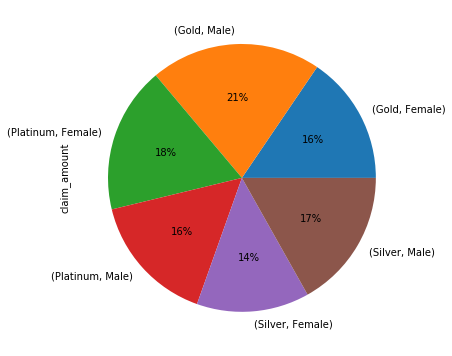

In [134]:
pie_plot = P.plot.pie(figsize =(6,8) , autopct='%1.0f%%')
plt.show()

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart 

In [135]:
B = tab.loc[((tab.incident_cause == 'Driver error') | (tab.incident_cause == 'Other driver error'))].groupby('gender')['gender'].count()

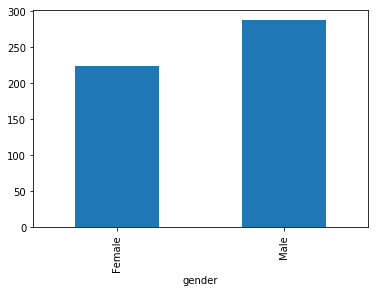

In [49]:
Bar_plot = B.plot.bar()

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

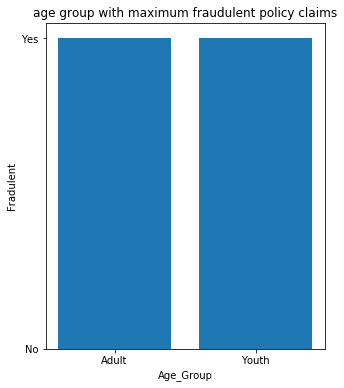

In [153]:
plt.figure(figsize = (5,6))
plt.bar(tab.Age_Group  , tab.fraudulent)
plt.xlabel('Age_Group')
plt.ylabel('Fradulent')
plt.title('age group with maximum fraudulent policy claims')
plt.show()

In [ ]:
tab.loc[tab.fraudulent == 'Yes']['Age_Group'].max() 

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.    

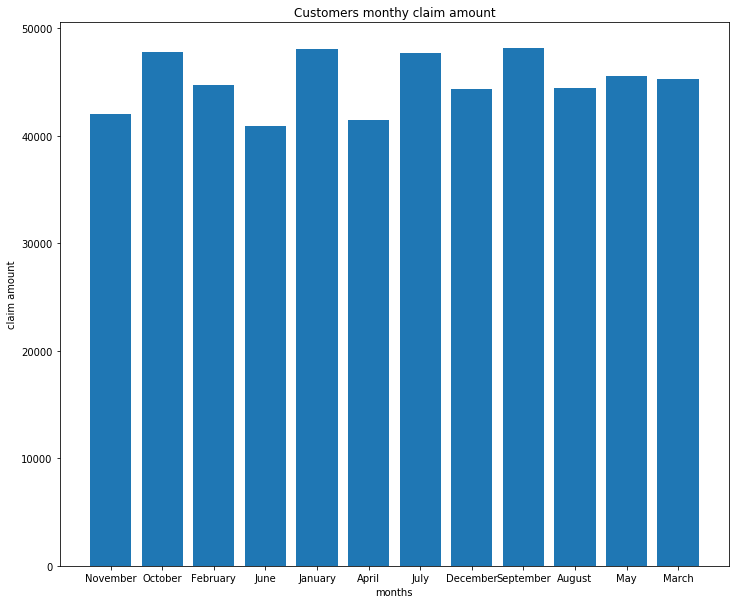

In [71]:
plt.figure(figsize = (12,10))
plt.bar(tab['claim_date'].dt.strftime('%B') , tab.claim_amount)
plt.xlabel('months')
plt.ylabel('claim amount')
plt.title('Customers monthy claim amount')
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


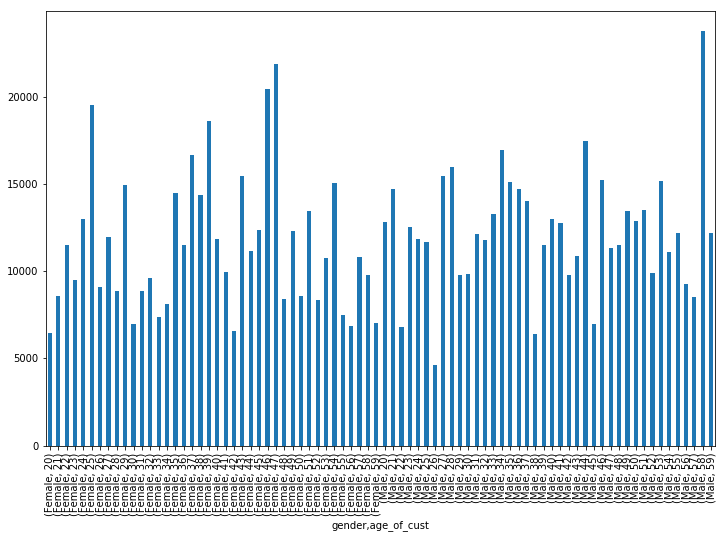

In [52]:
tab.groupby(['gender' , 'age_of_cust'])['claim_amount'].mean().plot(kind = 'bar' , stacked = True , figsize =(12, 8))

# 16  Is there any similarity in the amount claimed by males and females? 

In [162]:
Male = tab.claim_amount.loc[tab.gender == 'Male']
Female = tab.claim_amount.loc[tab.gender == 'Female']

stats.ttest_ind(a = Male, b = Female)

Ttest_indResult(statistic=0.9224506638597346, pvalue=0.35649620033387197)

In [ ]:
# Since p value is high we can conclude that there is similarity between males and females.

# 17. Is there any relationship between age category and segment? 

In [53]:
relation = pd.crosstab(index = tab.Segment , columns = tab.Age_Group)

In [54]:
stats.chi2_contingency(relation)

(2.7705725221441346,
 0.25025215208786716,
 2,
 array([[288.84272727,  98.15727273],
        [271.67636364,  92.32363636],
        [260.48090909,  88.51909091]]))

In [ ]:
# Since there are two categorical variales we shall perform chi square test.
# Since P value is high, which depicts there is relationship between Segment and Age category.

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $ 10,000.

In [ ]:
# Null hypothesis in this case is more than $10000.

In [ ]:
# Since mean is known , we have to perform one sample t - test.

In [55]:
stats.ttest_1samp(a = tab.claim_amount , popmean = 10000)

Ttest_1sampResult(statistic=4.508587442523224, pvalue=7.225797556053018e-06)

In [306]:
# As depicted p value is quite low , we will reject the null hypothesis which in turn 
# states that there is no significant rise in claim amounts as compared to previous year. 

# 19. Is there any difference between age groups and insurance claims? 

In [56]:
tab['C'] = tab.Age_Group[tab.Age_Group == 'Children'] = 0
tab['Y'] = tab.Age_Group[tab.Age_Group == 'Youth'] = 1
tab['A'] = tab.Age_Group[tab.Age_Group == 'Adult'] = 2
tab['S'] = tab.Age_Group[tab.Age_Group == 'Senior'] = 3


C:\Users\yoosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yoosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yoosha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yoosha\

In [57]:
stats.ttest_rel(a = tab.C , b = tab.claim_amount)

Ttest_relResult(statistic=-28.95863383020743, pvalue=1.7336902835729484e-137)

In [58]:
stats.ttest_rel(a = tab.Y , b = tab.claim_amount)

Ttest_relResult(statistic=-28.95618882556866, pvalue=1.8048174339805956e-137)

In [59]:
stats.ttest_rel(a = tab.A , b = tab.claim_amount)

Ttest_relResult(statistic=-28.95374382092989, pvalue=1.8788618358883909e-137)

In [60]:
stats.ttest_rel(a = tab.S , b = tab.claim_amount)

Ttest_relResult(statistic=-28.95129881629112, pvalue=1.9559431040016692e-137)

In [ ]:
# Since p value in every case is drastically low , we can conclude that there is no relation between insurance claim and age group.

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [61]:
stats.ttest_rel(a = tab.total_policy_claims , b = tab.claim_amount)

Ttest_relResult(statistic=-28.95471152800584, pvalue=1.8491994850336242e-137)

In [ ]:
# Since p value in every case is drastically low , we can conclude that there is no relation between total policy claims and claim amounts.